In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

IMPORTING CSV FILE

In [28]:
df = pd.read_csv('hotel_booking.csv')

In [29]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


EXPLORATORY DATA ANALYSIS AND DATA CLEANING

In [30]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [31]:
#check Duplicated data 
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [33]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [34]:
df.drop(['agent','company','email','phone-number','credit_card','meal','children', 'adults', 'babies'], axis=1, inplace=True)
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
name                              0
dtype: int64

In [36]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [37]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [38]:
# There are several outliers. We need to remove those data to avoid redundancy. We will remove only those outliers which are useful to our data analysis.
df = df[df['adr']<1000]

In [39]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000,118901.000000
mean,0.371368,104.308610,2016.157619,27.166845,15.800489,0.928899,2.502149,0.032010,0.087140,0.131631,0.221167,2.330695,101.956250,0.061883,0.571711
std,0.483173,106.903388,0.707482,13.589769,8.780367,0.996212,1.900168,0.176027,0.845858,1.484653,0.652774,17.630234,48.092478,0.244169,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


DATA ANALYSIS AND VISUALIZATION

The bar graph below depicts the percentage of cancelled bookings versus the ones that are not. There are clearly still a significant amount of reservations that have not been cancelled. Still, 37% of customers cancelled their bookings, which has a substantial impact on hotel earnings.

In [40]:
#calculating the percentage of cancelation 
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
cancelled_perc


0    0.628632
1    0.371368
Name: is_canceled, dtype: float64

<BarContainer object of 2 artists>

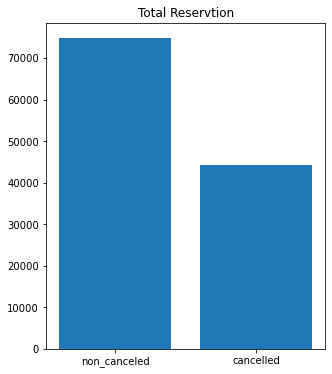

In [41]:

plt.figure(figsize=(5,6))
plt.title('Total Reservtion')
plt.bar(['non_canceled', 'cancelled'],df['is_canceled'].value_counts())

In [42]:
#Calculating hotel wise canceled reservation
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [43]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582889
1    0.417111
Name: is_canceled, dtype: float64

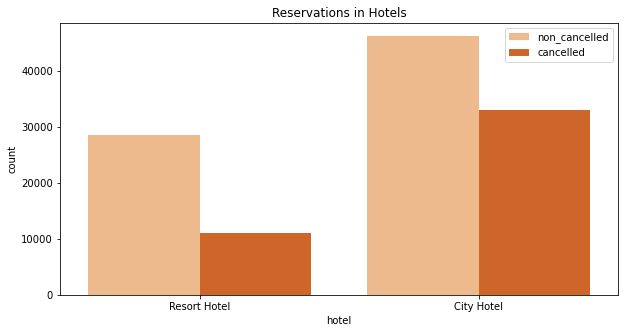

In [44]:
# Bar chart of hotel wise canceled reservation
plt.figure(figsize=(10,5))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Oranges')
plt.title('Reservations in Hotels')
plt.legend(['non_cancelled', 'cancelled'])
plt.show()

City hotels receive more bookings than Resort hotels. It is likely that resort hotels are more expensive than City hotel.As seen below, the average daily cost for the City hotel is cheaper than that of a Resort hotel on some days and considerably less on others. It goes without saying that Resort hotel rates can increase around weekends and holidays.

In [45]:
# Relationship between price and cancellation
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

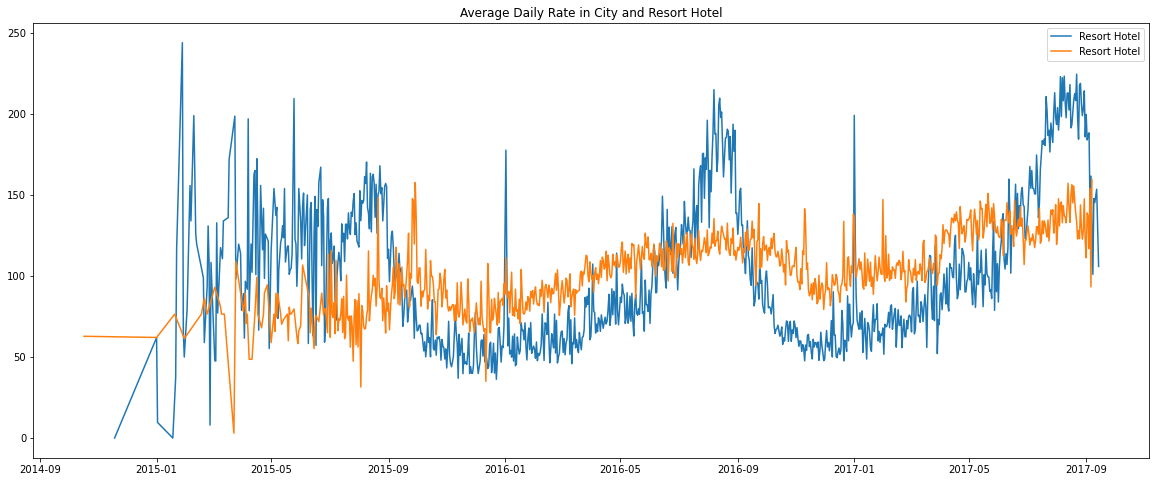

In [46]:
# Line chart to show the Relationship between price and cancellation
plt.figure(figsize=(20,8))
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'Resort Hotel')
plt.title('Average Daily Rate in City and Resort Hotel')
plt.legend()

As you can see below, I have developed the grouped bar graph to analyse the months with the highest and lowest reservation levels according to reservation status. Both the number of confirmed reservations and the number of cancelled reservations are the largest. in the month of August. Whereas January is the month with the most cancelled reservations.

In [47]:
#
df['month'] = df['reservation_status_date'].dt.month

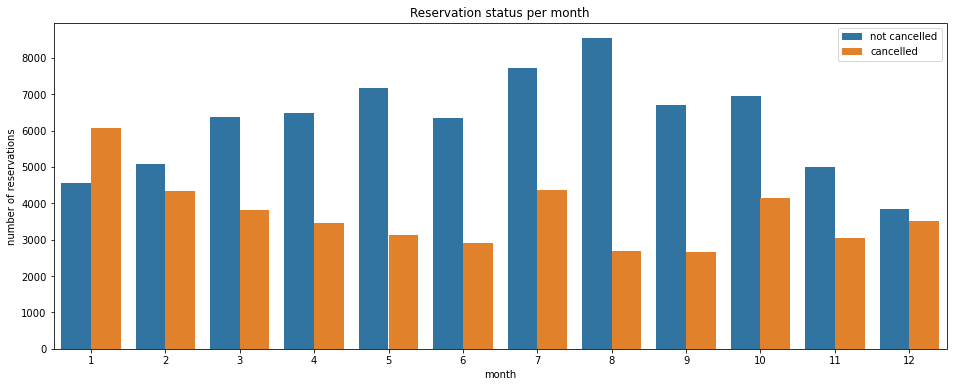

In [54]:
#Reservation status per month
plt.figure(figsize=(16,6))
ax1=sns.countplot(x = 'month', data=df, hue='is_canceled')
ax1.legend()
plt.title("Reservation status per month")
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not cancelled','cancelled'])
plt.show()

The chart below illustrates which countries have had the most reservations cancelled. The country with the most cancellations is Portugal.

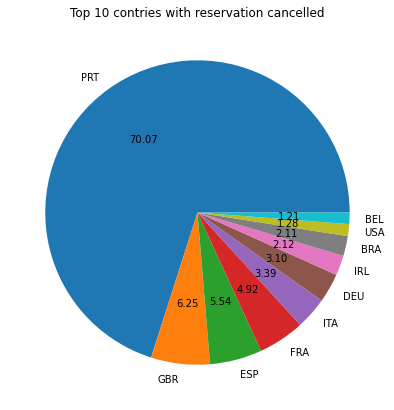

In [49]:
# contries vs cancellation rate

top_10_cancelled_country = df[df['is_canceled']==1]['country'].value_counts().head(10)

plt.figure(figsize=(7,7))
plt.title('Top 10 contries with reservation cancelled')
plt.pie(top_10_cancelled_country, autopct='%.2f', labels=top_10_cancelled_country.index)
plt.show()

Around 46% of the visitors come via online travel agencies, while 27% come from groups. Only 4% of clients book hotels and make bookings in person.

In [51]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474369
Offline TA/TO    0.203186
Groups           0.166576
Direct           0.104701
Corporate        0.042985
Complementary    0.006173
Aviation         0.001993
Undefined        0.000017
Name: market_segment, dtype: float64

In [52]:
df[df['is_canceled']==1]['market_segment'].value_counts(normalize=True)

Online TA        0.469676
Groups           0.273961
Offline TA/TO    0.187449
Direct           0.043505
Corporate        0.022149
Complementary    0.002038
Aviation         0.001178
Undefined        0.000045
Name: market_segment, dtype: float64

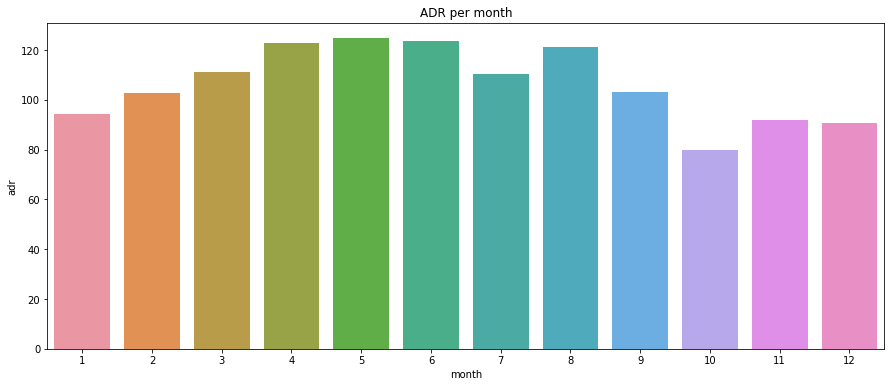

In [58]:
plt.figure(figsize=(15, 6))
plt.title('ADR per month')

canceled_reservations = df[df['is_canceled'] == 1]

# Group the data by month and calculate the mean of ADR
monthly_adr = canceled_reservations.groupby('month')['adr'].mean().reset_index()

# Plot the bar chart
sns.barplot(x='month', y='adr', data=monthly_adr)

plt.show()

SUGGESTIONS:
1. Pricing strategies: Hotels can analyze the relationship between cancellation rates and pricing. By adjusting their pricing strategies, they can offer lower rates for specific hotels based on their locations or seasons. This can attract more bookings and potentially reduce cancellations.
2. Weekend and holiday discounts: Since resort hotels have a higher cancellation ratio compared to city hotels, offering reasonable discounts on room prices during weekends or holidays can incentivize guests to book and reduce the likelihood of cancellations. Special promotions or packages tailored to these periods can also be effective.
3. January campaigns: Given that January has the highest cancellation rate, hotels can launch targeted marketing campaigns during this month. Offering attractive deals, such as discounted rates or value-added services, can encourage guests to maintain their bookings and increase revenue during this period.¶
4. Quality improvements: Focusing on improving the quality of hotels and services, particularly in Portugal where cancellations are prominent, can enhance guest satisfaction and reduce cancellations. This can include upgrading facilities, enhancing customer service, and actively addressing guest feedback to create a positive experience that encourages guests to keep their reservations.
 Implementing these suggestions can help hotels minimize cancellations and increase guest satisfaction, ultimately leading to improved revenue and a stronger reputation in the industry